In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
np.random.seed(42)


In [3]:
num_samples = 500


In [4]:
immune_level = np.random.uniform(20, 90, num_samples)
hypoxia_level = np.random.uniform(10, 90, num_samples)
growth_rate = np.random.uniform(20, 95, num_samples)
stromal_density = np.random.uniform(10, 80, num_samples)
angiogenesis = np.random.uniform(20, 90, num_samples)


In [5]:
drug_response = []

for i in range(num_samples):
    score = (
        0.4 * immune_level[i]
        + 0.3 * angiogenesis[i]
        - 0.4 * hypoxia_level[i]
        - 0.3 * growth_rate[i]
        - 0.2 * stromal_density[i]
    )

    if score > 10:
        drug_response.append(1)  # Drug works
    else:
        drug_response.append(0)  # Drug fails


In [6]:
df = pd.DataFrame({
    "immune_level": immune_level,
    "hypoxia_level": hypoxia_level,
    "growth_rate": growth_rate,
    "stromal_density": stromal_density,
    "angiogenesis": angiogenesis,
    "drug_response": drug_response
})

df.head()


,immune_level,hypoxia_level,growth_rate,stromal_density,angiogenesis,drug_response
0,46.217808,65.852937,33.884970,46.335725,38.319398,0
1,86.550001,52.887709,60.642571,43.542731,37.288516,0
2,71.239576,34.762209,85.470938,11.794945,83.437821,1
3,61.906094,75.103602,74.916866,33.887348,37.468234,0
4,30.921305,64.778494,80.492086,36.613693,39.036481,0


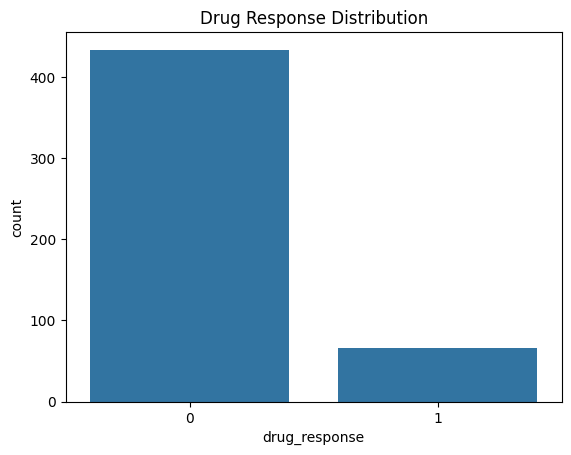

In [7]:
sns.countplot(x="drug_response", data=df)
plt.title("Drug Response Distribution")
plt.show()


In [8]:
df.to_csv("synthetic_drug_efficacy_data.csv", index=False)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [10]:
# Features (X) and target (y)
X = df.drop("drug_response", axis=1)
y = df["drug_response"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       109
           1       1.00      0.94      0.97        16

    accuracy                           0.99       125
   macro avg       1.00      0.97      0.98       125
weighted avg       0.99      0.99      0.99       125



In [15]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

feature_importance


,Feature,Coefficient
0,immune_level,2.653114
4,angiogenesis,2.265521
3,stromal_density,-1.353650
2,growth_rate,-2.110452
1,hypoxia_level,-2.769646


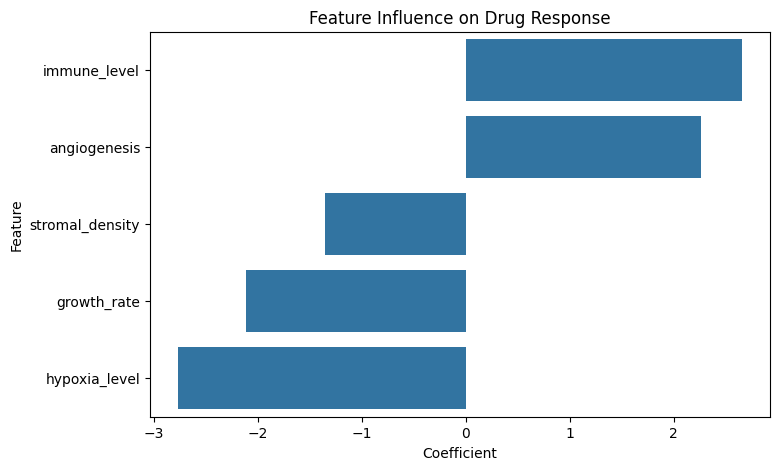

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(
    x="Coefficient",
    y="Feature",
    data=feature_importance
)
plt.title("Feature Influence on Drug Response")

plt.savefig("/content/drug_feature_importance.png", dpi=300, bbox_inches="tight")
plt.show()



In [17]:
feature_importance.to_csv("drug_feature_importance.csv", index=False)
